# Linear regression

In linear regression, we assume that the response $y$ is linear in its features $X$, therefore giving us a predictor

$$f_{\theta}(x)=x^T\theta$$

We want to choose $\hat{\theta}$ that minimizes the mean square error

$$
\begin{align*}
\hat{\theta} &= \underset{\theta}{\text{argmin}}\; \frac{1}{n}\sum_{i=1}^n (x_i^T\theta - y_i)^2\\
&= \underset{\theta}{\text{argmin}}\;\frac{1}{n}||X\theta-y||_2^2
\end{align*}
$$

Where $X$ is the matrix obtained by concatenating the features $\{x_i\}$. To find the optimum, the first order condition is given by 

$$\frac{\partial{L}}{\partial{\theta}} = \frac{1}{n} [(2(X^TX)\theta - 2(X^Ty)]=0\implies (X^TX)\theta=X^Ty$$

Therefore, we can solve $\theta$ directly by solving the linear system. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt

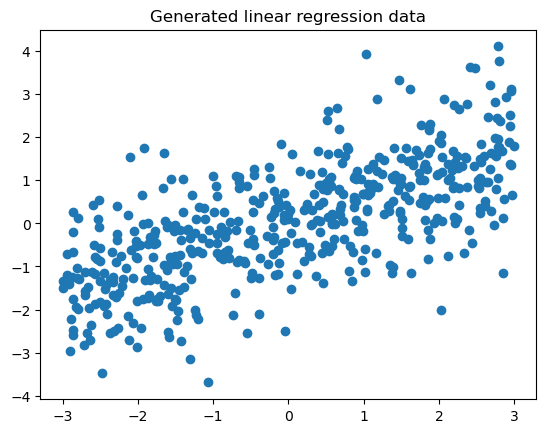

In [9]:
x = np.random.uniform(-3, 3, 500)
y = 0.5 * x + np.random.randn(x.shape[0])

plt.scatter(x, y)
plt.title("Generated linear regression data")
plt.show()

In [12]:
theta = np.dot(x.T, y) / np.dot(x.T, x)
print(f"Estimated theta: {theta}")

Estimated theta: 0.537474565566123


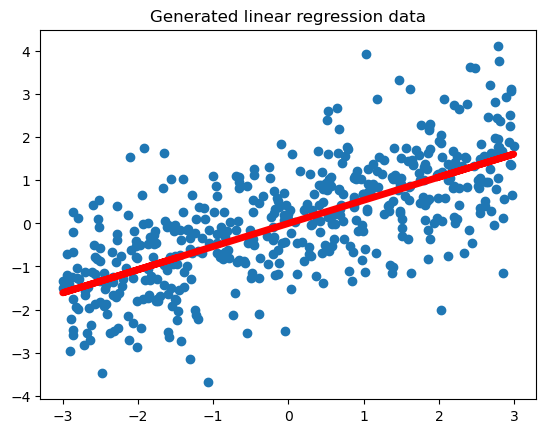

In [18]:
plt.scatter(x, y)
plt.plot(x, theta * x, c="r", lw=5)
plt.title("Generated linear regression data")
plt.show()

In the case of multiple-dimensions, instead of taking the inverse

$$\hat{\theta}=(X^TX)^{-1}(X^Ty)$$

It is usually preferred to solve the linear system due to numerical stability. 

In [31]:
x1 = np.random.uniform(-3, 3, 500)
x2 = np.random.uniform(-3, 3, 500)
x3 = np.random.uniform(-3, 3, 500)
y = 0.213 * x1 + 0.345 * x2 + 0.289 * x3 + np.random.randn(x1.shape[0])

In [34]:
X = np.vstack((x1, x2, x3)).T
theta = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))
print(f"Estimated theta: {[theta[0], theta[1], theta[2]]}")

Estimated theta: [0.23011540831649524, 0.31642685949059507, 0.25409945787014604]


## Feature transform

Even though it seems that linear regression can only leanr linear patterns. It turns out that it can also learn non-linear relationships between the features and responses. To do so we consider a feature map $\phi:\mathbb{R}^d\rightarrow \mathbb{R}^p$ that maps each $d$-dimensional feature to a $p$ dimensional feature. We then perform linear regression on the transformed data. The prediction fucntion now becomes

$$f_{\theta}(x)=\phi(x)^T\theta$$

And the normal equation, using the same derivations, becomes

$$(\Phi^T\Phi)\theta = \Phi^Ty$$

For example, given $x_i, y\in \mathbb{R}$, suppose we want to find a cubic polynomial 

$$f_{\theta}(x)=\theta_3x^3 + \theta_2 x^2 + \theta_1 x+ \theta_0$$

To the dataset. We can consider a feature map 

$$\phi(x) = [x_3, x_2, x, 1]$$

The polynomial fitting problem now reduces back to linear regression problem. 